Report: correlation between language proficiency and employment rates among migrants in Leipzig

Contents :

Introduction
Data Source
Installation of dependencies
Loading Data
Answering broad questions
Question 1 and Inference 1
Question 2 and Inference 2
Question 3 and Inference 3
Conclusion
Questions for further research

Introduction:

This project aims to investigate the relationship between language proficiency and employment trends among migrants in Leipzig, Germany. Our primary goal is to understand how migrants' language skills influence their ability to secure jobs and integrate into the local workforce.

The motivation behind this project stems from the importance of fostering inclusive and equitable employment opportunities for migrants, a segment of the population often facing unique challenges in the labor market. We want to contribute to evidence-based policy decisions and support programs that promote successful integration.

Datasources:

Datasource1: Employment of migrants
Metadata URL: https://mobilithek.info/offers/-6901989592576801458
Data URL: https://opendata.leipzig.de/dataset/ac13f1cd-1515-47df-bc6f-ec18ae325918/resource/10e95615-f843-4b9f-8712-60e7be53eb5f/download/abb9erwerbstatigkeitmigratinnen.csv
Data Type: CSV
Description: This overview provides an overview of the proportion of Leipzig migrants who are employed. The data is grouped by gender and country of origin and was collected as part of the 2020 migrant survey.

Datasource2: Language understanding of migrants
Metadata URL: https://www.govdata.de/ckan/dataset/sprachverstandnis-migrantinnen.rdf
Data URL: https://opendata.leipzig.de/dataset/126ea2a3-38f4-410d-91fe-c683558c99cd/resource/c269e8b9-9adf-4202-ad15-14317a505691/download/abb8sprachverstandnis.csv
Data Type: CSV
Description: The data collection provides an overview of the language understanding of Leipzig migrants in relation to the German language (self-assessment), grouped by country of origin and gender. The percentage of respondents who stated that they understood the German language “very well” or “well” is listed.

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

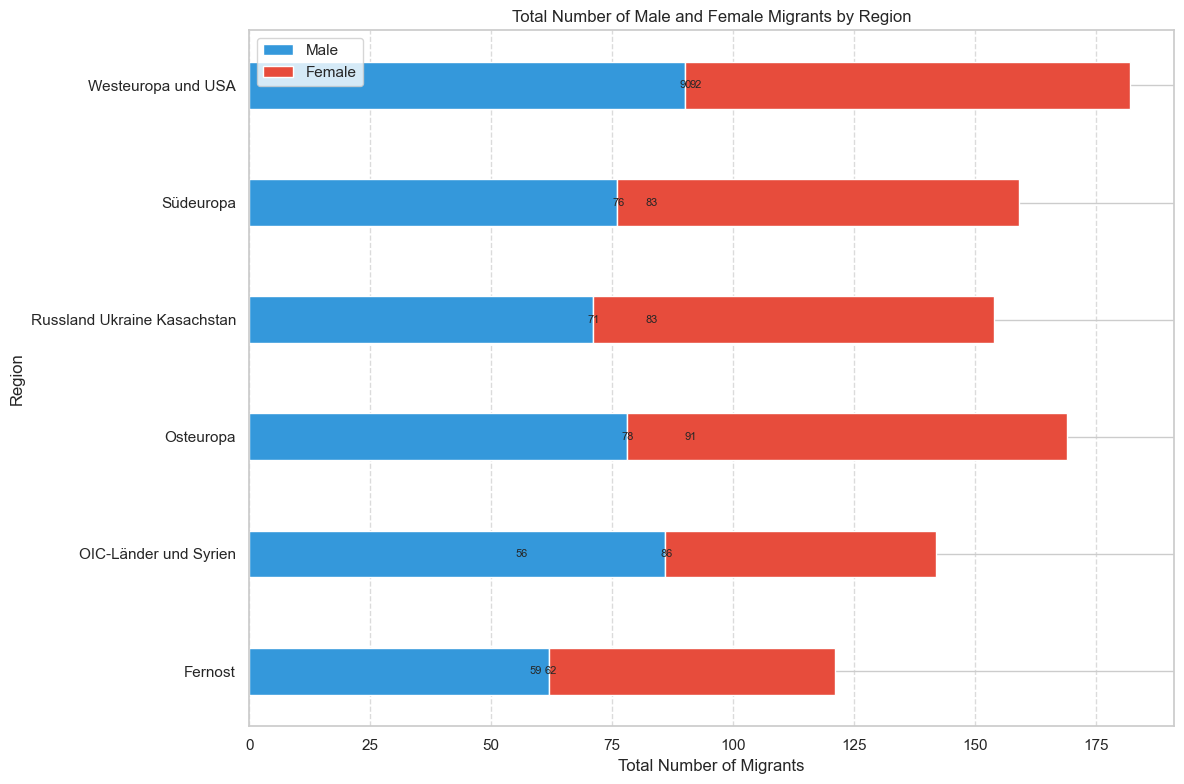

In [186]:
# Connect to the SQLite database
database_path = 'data'
conn1 = sqlite3.connect(r'C:\Users\49157\PycharmProjects\made-template\project\data\employment_data_transformed.db')
table_name1 = 'employment_data_transformed'
#print(f"Exploring data in {table_name1}:\n")
query1 = f"SELECT * FROM `{table_name1}`;"
employment_data = pd.read_sql_query(query1, conn1)
table_df = pd.DataFrame(employment_data)
#print(table_df)

conn2 = sqlite3.connect(r'C:\Users\49157\PycharmProjects\made-template\project\data\language_data_transformed.db')
# Query data from the tables in each database
table_name2 = 'language_data_transformed'
# Query data from the table
#print(f"Exploring data in {table_name2}:\n")
query2 = f"SELECT * FROM `{table_name2}`;"
language_data = pd.read_sql_query(query2, conn2)
table_df = pd.DataFrame(language_data)
#print(table_df)



# Grouping and Aggregating
migrants_by_region = language_data.groupby('Region')[['German_understanding_male', 'German_understanding_female']].sum()

# Set a seaborn style
sns.set(style="whitegrid")

# Visualization as a horizontal bar chart
plt.figure(figsize=(12, 8))
bar_height = 0.4

bar_male = plt.barh(migrants_by_region.index, migrants_by_region['German_understanding_male'], label='Male', color='#3498db', height=bar_height)
bar_female = plt.barh(migrants_by_region.index, migrants_by_region['German_understanding_female'], left=migrants_by_region['German_understanding_male'], label='Female', color='#e74c3c', height=bar_height)

# Add grid lines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Labeling and Title
plt.ylabel('Region')
plt.xlabel('Total Number of Migrants')
plt.title('Total Number of Male and Female Migrants by Region')
plt.legend(loc='upper left')

# Show values on the right of bars with adjusted spacing and font size
for bar in bar_male + bar_female:
    xval = bar.get_width()
    plt.text(xval - 1, bar.get_y() + bar_height/2, int(xval), ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Merge datasets on a common key (assuming 'Gebiet' is common between the datasets)
merged_data = pd.merge(language_data, employment_data, on='Region', how='inner')

Question 1: What is the correlation between the language proficiency of male and female migrants and their employment rates in Leipzig?


The correlation between language proficiency of men and employment rates is: 0.6254401704972342
The correlation between language proficiency of women and employment rates is: 0.9466444642277179


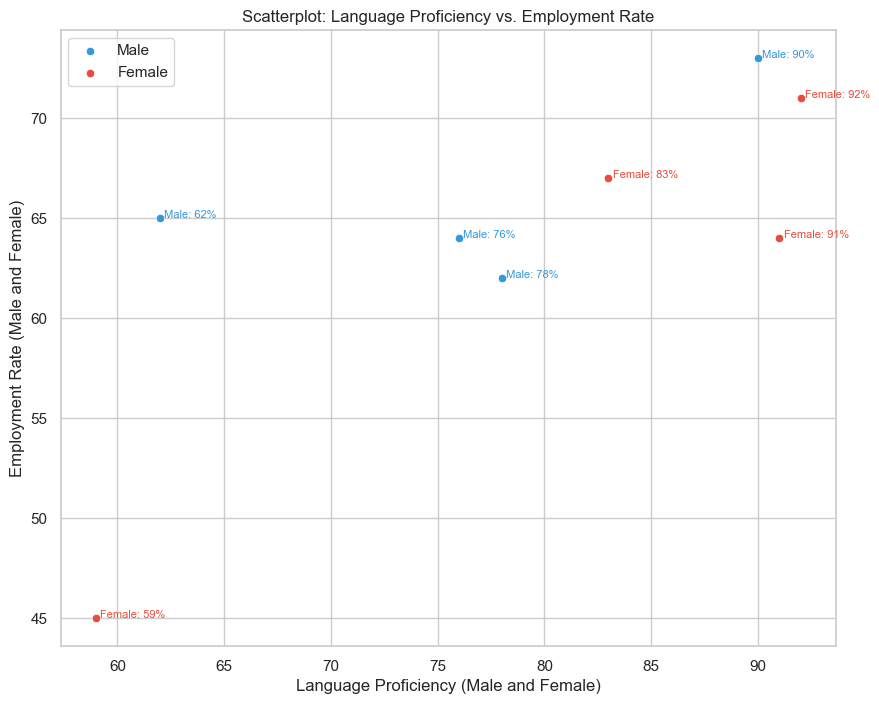

In [187]:
# Calculate the correlation between language proficiency of men and employment rates of men
correlation_male = merged_data['German_understanding_male'].corr(merged_data['Male'])
print(f"The correlation between language proficiency of men and employment rates is: {correlation_male}")

# Calculate the correlation between language proficiency of women and employment rates of women
correlation_female = merged_data['German_understanding_female'].corr(merged_data['Female'])
print(f"The correlation between language proficiency of women and employment rates is: {correlation_female}")

# Set a seaborn style
sns.set(style="whitegrid")

# Create a scatterplot with color-coded points for male and female
plt.figure(figsize=(10, 8))
scatterplot_male = sns.scatterplot(x='German_understanding_male', y='Male', data=merged_data, label='Male', color='#3498db')
scatterplot_female = sns.scatterplot(x='German_understanding_female', y='Female', data=merged_data, label='Female', color='#e74c3c')

# Add title and labels
plt.title('Scatterplot: Language Proficiency vs. Employment Rate')
plt.xlabel('Language Proficiency (Male and Female)')
plt.ylabel('Employment Rate (Male and Female)')

# Label data points with values
for i, row in merged_data.iterrows():
    scatterplot_male.text(row['German_understanding_male'] + 0.2, row['Male'], f"Male: {row['German_understanding_male']}%", fontsize=8, color='#3498db')
    scatterplot_female.text(row['German_understanding_female'] + 0.2, row['Female'], f"Female: {row['German_understanding_female']}%", fontsize=8, color='#e74c3c')

plt.legend()
plt.show()


Inference 1:
The provided correlation coefficients indicate a moderate positive correlation between language proficiency and employment rates for male migrants (0.625) and a strong positive correlation for female migrants (0.947) in Leipzig. These correlations suggest that as language proficiency increases, the employment rates of both male and female migrants also tend to increase.
 Above findings indicate that language proficiency, particularly in foreign languages such as English and German, has a significant impact on the employment status of migrants. For example, foreign language skills can increase the probability of being employed for both men and women in various countries.

Question 2: How do language proficiency levels vary across different regions in Leipzig for both males and females?

                        Region  Average_language_proficiency
0           Westeuropa und USA                          91.0
1                    Osteuropa                          84.5
2                    Südeuropa                          79.5
3  Russland Ukraine Kasachstan                          77.0
4        OIC-Länder und Syrien                          71.0
5                      Fernost                          60.5


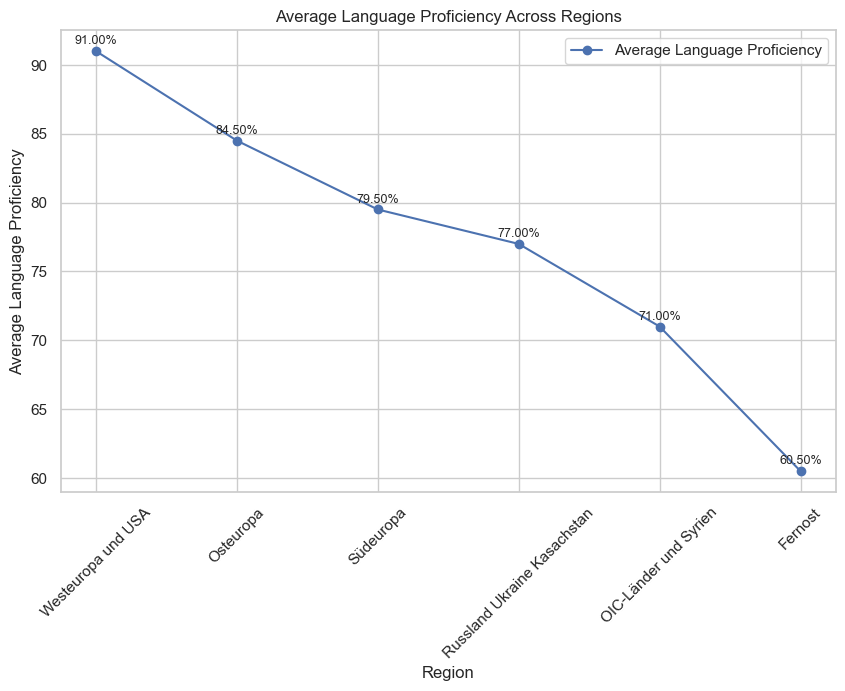

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
language_data = {
    'Region': ['Westeuropa und USA', 'Osteuropa', 'Südeuropa', 'Russland Ukraine Kasachstan', 'OIC-Länder und Syrien', 'Fernost'],
    'German_understanding_male': [90, 78, 76, 71, 86, 62],
    'German_understanding_female': [92, 91, 83, 83, 56, 59]
}

df = pd.DataFrame(language_data)

# Calculate average language proficiency for each region
df['Average_language_proficiency'] = df[['German_understanding_male', 'German_understanding_female']].mean(axis=1)
# Display the resulting DataFrame
#print(df[['Region', 'Average_language_proficiency']])
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Region'], df['Average_language_proficiency'], marker='o', color='b', label='Average Language Proficiency')

# Add annotations with percentages
for i, average_percentage in enumerate(df['Average_language_proficiency']):
    plt.annotate(f"{average_percentage:.2f}%", (i, average_percentage), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)

plt.xlabel('Region')
plt.ylabel('Average Language Proficiency')
plt.title('Average Language Proficiency Across Regions')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()



Inference 2:
There is variability in language proficiency across different regions, and the gender gap in language proficiency varies.
Westeuropa und USA (Average Proficiency: 91.0%): This region exhibits the highest average language proficiency among males and females.
Both genders show strong language understanding, contributing to the overall high proficiency.
Fernost (Average Proficiency: 60.5%): This region has the lowest average language proficiency among the regions. Both genders contribute to this lower proficiency, with females having a slightly higher proficiency compared to males.
The data suggests that regional factors may influence language proficiency levels, and understanding these patterns can be valuable for language education and support programs. Additionally, addressing gender disparities in certain regions may be important for targeted interventions.

Question 3: What is the correlation between the average language proficiency levels in regions with the highest and lowest proficiency and the employment rates of migrants in those respective areas?

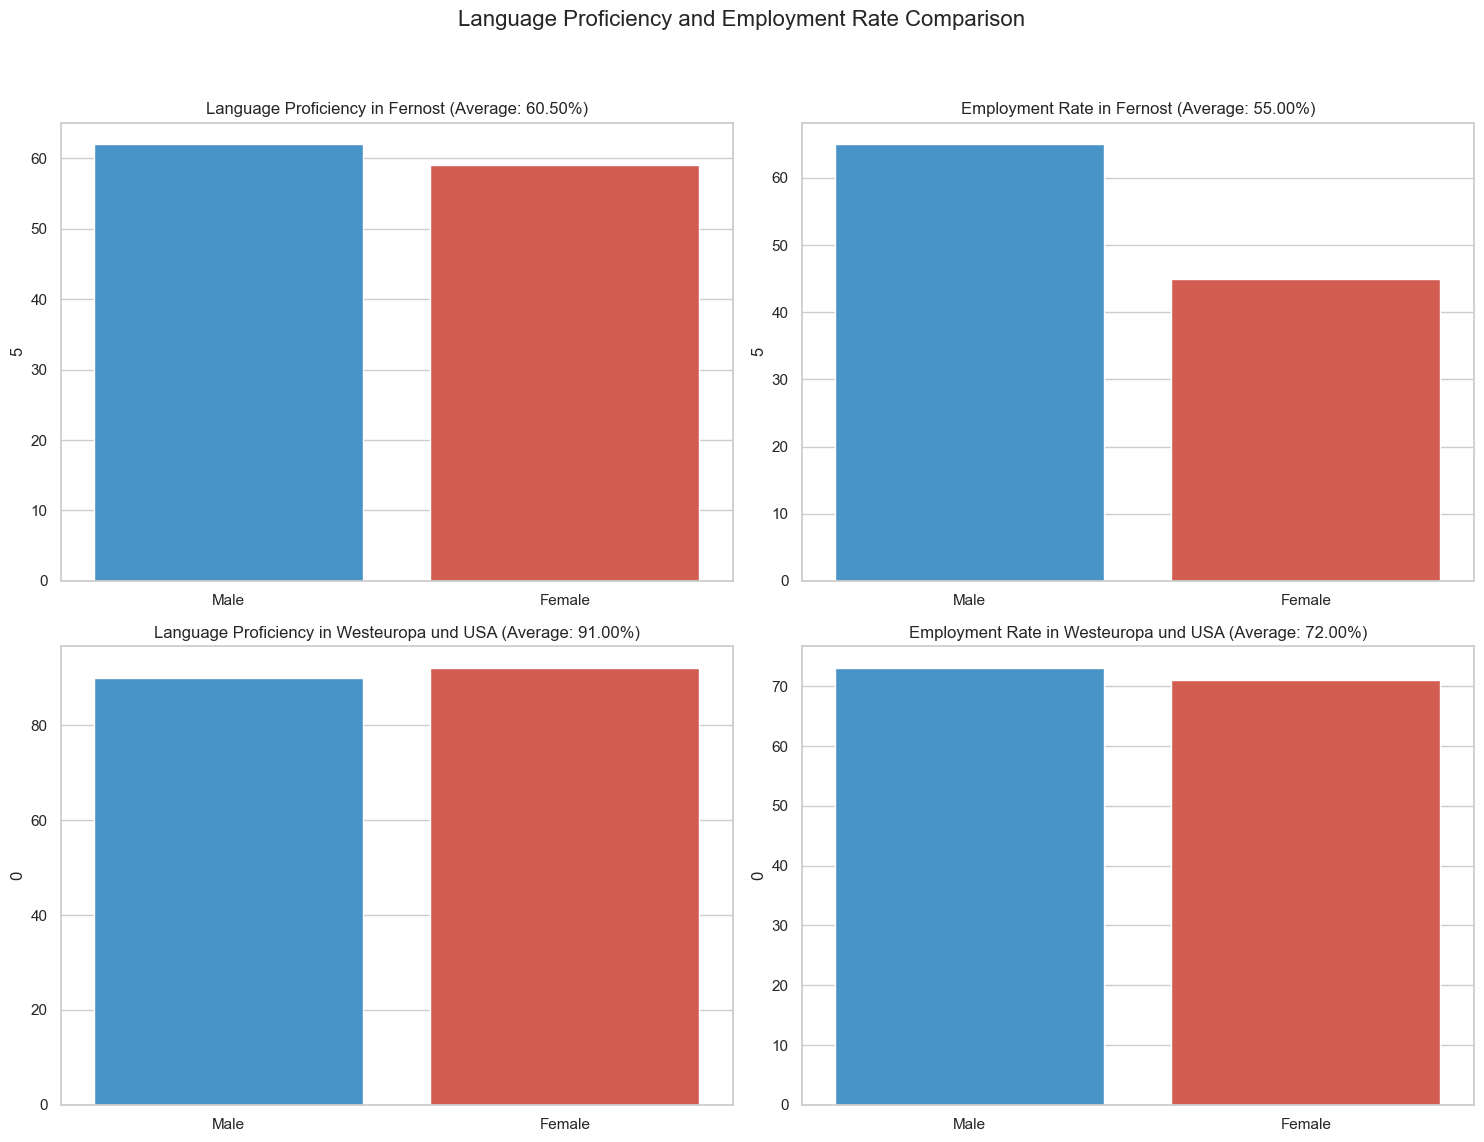

In [210]:

# Create DataFrames
language_df = pd.DataFrame(language_data)
employment_df = pd.DataFrame(employment_data)

# Filter Data for OIC-Länder und Syrien and Westeuropa und USA
Fernost_language = language_df[language_df['Region'] == 'Fernost']
Fernost_employment = employment_df[employment_df['Region'] == 'Fernost']
westeuropa_language = language_df[language_df['Region'] == 'Westeuropa und USA']
westeuropa_employment = employment_df[employment_df['Region'] == 'Westeuropa und USA']

# Calculate the average proficiency for 'Fernost' and 'Westeuropa und USA'
average_proficiency_fernost = Fernost_language[['German_understanding_male', 'German_understanding_female']].mean(axis=1).values[0]
average_proficiency_westeuropa = westeuropa_language[['German_understanding_male', 'German_understanding_female']].mean(axis=1).values[0]

# Calculate the average employment rate for 'Fernost' and 'Westeuropa und USA'
average_employment_fernost = Fernost_employment[['Male', 'Female']].mean(axis=1).values[0]
average_employment_westeuropa = westeuropa_employment[['Male', 'Female']].mean(axis=1).values[0]

# Set a seaborn style
sns.set(style="whitegrid")

# Visualize Language Proficiency and Employment Rate
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Language Proficiency and Employment Rate Comparison', fontsize=16)

# Language Proficiency in Fernost
sns.barplot(x=['Male', 'Female'], y=Fernost_language.iloc[0, 1:], palette=['#3498db', '#e74c3c'], ax=axs[0, 0])
axs[0, 0].set_title(f'Language Proficiency in Fernost (Average: {average_proficiency_fernost:.2f}%)')

# Employment Rate in Fernost
sns.barplot(x=['Male', 'Female'], y=Fernost_employment.iloc[0, 1:], palette=['#3498db', '#e74c3c'], ax=axs[0, 1])
axs[0, 1].set_title(f'Employment Rate in Fernost (Average: {average_employment_fernost:.2f}%)')

# Language Proficiency in Westeuropa und USA
sns.barplot(x=['Male', 'Female'], y=westeuropa_language.iloc[0, 1:], palette=['#3498db', '#e74c3c'], ax=axs[1, 0])
axs[1, 0].set_title(f'Language Proficiency in Westeuropa und USA (Average: {average_proficiency_westeuropa:.2f}%)')

# Employment Rate in Westeuropa und USA
sns.barplot(x=['Male', 'Female'], y=westeuropa_employment.iloc[0, 1:], palette=['#3498db', '#e74c3c'], ax=axs[1, 1])
axs[1, 1].set_title(f'Employment Rate in Westeuropa und USA (Average: {average_employment_westeuropa:.2f}%)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout for the suptitle
plt.show()

Inference:
Westeuropa und USA (Western Europe and USA): exhibits a high average language proficiency, indicating a strong language foundation. The higher employment rate suggests that migrants in this region may have better access to job opportunities, potentially due to their proficient language skills.
Fernost (Eastern Region): shows a moderate average language proficiency and a relatively lower employment rate. Further exploration into language education and employment support programs may be beneficial for this region to enhance language skills and increase employment opportunities for migrants.

Conclusion:
This analysis delves into the intricate dynamics between language proficiency and employment rates among migrants in Leipzig, Germany. The primary findings are summarized below:

1. Correlation between Language Proficiency and Employment Rates:
A positive correlation is observed between language proficiency and employment rates for both male and female migrants in Leipzig.
The strength of the correlation is moderate for males (0.625) and strong for females (0.947), emphasizing the pivotal role of language proficiency in employment outcomes.
2. Regional Variations in Language Proficiency:
Language proficiency levels exhibit significant regional variability, with Westeuropa und USA boasting the highest average proficiency (91.0%) and Fernost registering the lowest (60.5%).
Recognizing these regional patterns is crucial for tailoring targeted language education and support programs.
3. Linking Language Proficiency, Employment, and Regions:
Westeuropa und USA showcases a positive relationship between high language proficiency and employment rates, highlighting potential success factors.
Fernost, with lower language proficiency and a comparatively reduced employment rate, suggests the necessity for specific interventions.

Further Research Avenues:

Detailed Regional Analysis:
Explore the specific factors contributing to varying language proficiency levels across different regions.
Investigate how regional economic conditions and job markets impact migrants' employment rates.
Impact of Language Education:

Long-Term Integration Dynamics:
Examine how the duration of residence in Leipzig influences migrants' language proficiency and employment trajectories.
Identify observable trends in the long-term integration of migrants based on language skills and employment stability.

By addressing these research avenues, future studies can contribute nuanced insights into the intricate relationship between language proficiency, employment, and regional dynamics among migrants in Leipzig.